In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import re
import string

In [9]:
cd ..

/data/nasif12/home_if12/chengju/project/news


In [10]:
fkn = pd.read_pickle("./data/fkn.gzip")

In [6]:
fkn.head()

,index,title,text,label
0,8476,"[you, can, smell, hillari, fear]","[daniel, greenfield, shillman, journal, fellow...",1
1,10294,"[watch, the, exact, moment, paul, ryan, commit...","[googl, pinterest, digg, linkedin, reddit, stu...",1
2,3608,"[kerri, go, pari, gestur, sympathi]","[us, secretari, state, john, f, kerri, said, m...",0
3,10142,"[berni, support, twitter, erupt, anger, dnc, w...","[—, kayde, king, kaydeek, novemb, 9, 2016, the...",1
4,875,"[the, battl, new, york, whi, this, primari, ma...","[it, primari, day, new, york, frontrunn, hilla...",0


## Clean text data

## Pickle the output

In [111]:
#fkn.to_pickle("./data/fkn.gzip")

## Train validation test split

In [11]:
import numpy as np
import pandas as pd

def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.ix[perm[:train_end]]
    validate = df.ix[perm[train_end:validate_end]]
    test = df.ix[perm[validate_end:]]
    return train, validate, test

In [12]:
train_dt, validate_dt, test_dt = train_validate_test_split(fkn)

In [9]:
print("training shape", train_dt.shape)
print("validating shape", validate_dt.shape)
print("testing shape", test_dt.shape)

training shape (3801, 4)
validating shape (1267, 4)
testing shape (1267, 4)


## tf-idf of text body

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [14]:
" ".join(fkn["title"][0])

'you can smell hillari fear'

In [15]:
train_dt["text"] = train_dt["text"].apply(lambda x: " ".join(x))

In [16]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_dt.text)
X_train_counts.shape

(3801, 49725)

In [17]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
y_train = train_dt["label"].as_matrix()

In [18]:
validate_dt["text"] = validate_dt["text"].apply(lambda x: " ".join(x))

In [19]:
X_val_counts = count_vect.transform(validate_dt.text)
X_val_tfidf = tfidf_transformer.transform(X_val_counts)
y_val = validate_dt["label"].as_matrix()

In [20]:
test_dt["text"] = test_dt["text"].apply(lambda x: " ".join(x))

In [21]:
X_test_counts = count_vect.transform(test_dt.text)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_test = test_dt["label"].as_matrix()

In [19]:
X_train_tfidf.shape

(3801, 50312)

(array([  3.59500000e+03,   1.67000000e+02,   2.60000000e+01,
          7.00000000e+00,   3.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([     0. ,   1138.4,   2276.8,   3415.2,   4553.6,   5692. ,
          6830.4,   7968.8,   9107.2,  10245.6,  11384. ]),
 <a list of 10 Patch objects>)

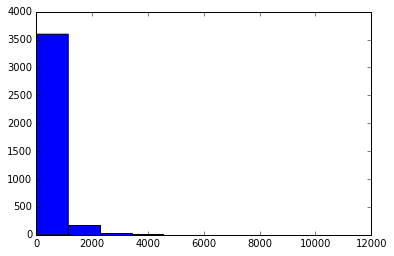

In [20]:
# Document lenght
plt.hist(X_train_counts.sum(1))

In [22]:
from src.helper import save_sparse_csr

Using TensorFlow backend.


In [58]:
save_sparse_csr("./data/X_train_tfidf", X_train_tfidf)
save_sparse_csr("./data/X_val_tfidf", X_val_tfidf)
save_sparse_csr("./data/X_test_tfidf", X_test_tfidf)

In [59]:
np.save("./data/y_train", y_train)
np.save("./data/y_val", y_val)
np.save("./data/y_test", y_test)

In [144]:
# X_train_tfidf = load_sparse_csr("./data/X_train_tfidf.npz")
# X_val_tfidf = load_sparse_csr("./data/X_val_tfidf.npz")
# X_test_tfidf = load_sparse_csr("./data/X_test_tfidf.npz")

In [23]:
X_train_counts.sum(0)[X_train_counts.sum(0) == 3]

matrix([[3, 3, 3, ..., 3, 3, 3]], dtype=int64)

## world could 

In [24]:
fkn1 = fkn[fkn["label"] == 1]
texts = fkn1["text"]
texts = texts.apply(lambda x: " ".join(x))

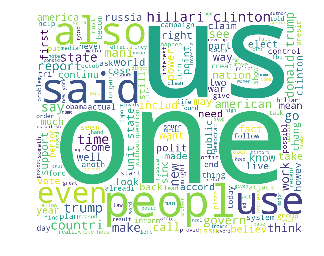

In [25]:
from wordcloud import WordCloud, STOPWORDS

wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(texts))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

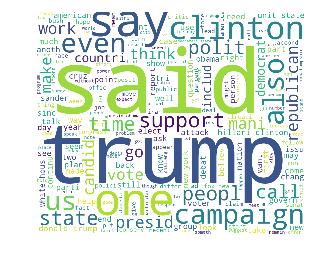

In [25]:
fkn1 = fkn[fkn["label"] == 0]
texts = fkn1["text"]
texts = texts.apply(lambda x: " ".join(x))
wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(texts))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [29]:
fkn.head(3)

,index,title,text,label
0,8476,"[you, can, smell, hillari, fear]","[daniel, greenfield, shillman, journal, fellow...",1
1,10294,"[watch, the, exact, moment, paul, ryan, commit...","[googl, pinterest, digg, linkedin, reddit, stu...",1
2,3608,"[kerri, go, pari, gestur, sympathi]","[us, secretari, state, john, f, kerri, said, m...",0


## visulize naive bayes result

BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions:

In [26]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

In [27]:
train_dt["text"][:2]

1966    four former top economist democrat administr s...
2087    next swipe leftright at least tesco give shopp...
Name: text, dtype: object

In [42]:
train_dt, validate_dt, test_dt = train_validate_test_split(fkn, train_percent=.79,seed=8888)

In [43]:
train_dt["text"] = train_dt["text"].apply(lambda x: " ".join(x))
count_vect = CountVectorizer(min_df=1)
X_train_counts = count_vect.fit_transform(train_dt.text)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

y_train = train_dt["label"].as_matrix()
validate_dt["text"] = validate_dt["text"].apply(lambda x: " ".join(x))

X_val_counts = count_vect.transform(validate_dt.text)
X_val_tfidf = tfidf_transformer.transform(X_val_counts)
y_val = validate_dt["label"].as_matrix()

# test_dt["text"] = test_dt["text"].apply(lambda x: " ".join(x))

# X_test_counts = count_vect.transform(test_dt.text)
# X_test_tfidf = tfidf_transformer.transform(X_test_counts)
# y_test = test_dt["label"].as_matrix()

In [30]:
t_y = y_train - y_train.mean()
t_x = X_train_counts - X_train_counts.mean(axis=0)
#/[X_train_counts>0].sum(axis=0)

In [35]:
print(t_x.shape)
print(t_y.shape)
covXY = np.dot(t_x.T,t_y.reshape(-1))/(X_train_counts).sum(axis=0)

(5004, 57932)
(5004,)


In [36]:
g, binedge = np.histogram(np.squeeze(np.asarray(covXY)),bins = 10,range=(-.00005, .00001))
print(g)
print(binedge*1e5)

[0 0 0 0 0 0 0 0 0 0]
[-5.  -4.4 -3.8 -3.2 -2.6 -2.  -1.4 -0.8 -0.2  0.4  1. ]


In [38]:
def BernoulliNB_sum(X_tr, y_tr, X_v,y_v, alpha=1.0, plotROC = False):
    clf = BernoulliNB(alpha)
    clf.fit(X_tr, y_tr)
    predict_train = clf.predict(X_tr)
    precision_train, recall_train, _ = metrics.precision_recall_curve(y_tr, predict_train)

    
    predict_val = clf.predict(X_v)
    precision_val, recall_val, _ = metrics.precision_recall_curve(y_v, predict_val)
    
    fpr_train, tpr_train, thresholds = metrics.roc_curve(y_tr, predict_train)
    fpr_val, tpr_val, thresholds = metrics.roc_curve(y_v, predict_val)
    
    

    prd_tr = metrics.accuracy_score(y_tr, predict_train) # metrics.auc(fpr_train, tpr_train)
    prd_v = metrics.accuracy_score(y_v, predict_val)# metrics.auc(fpr_val, tpr_val)
    
    if plotROC:
        print("performance for the training data")
        print(metrics.classification_report(y_tr, predict_train))
        print("performance for the test data")
        print(metrics.classification_report(y_v, predict_val))

        auc_train = metrics.auc(fpr_train, tpr_train)
        auc_val = metrics.auc(fpr_val, tpr_val)
        
        plt.plot(fpr_train, tpr_train,
                label='Training ROC curve (area = %0.2f)' % auc_train)
        plt.plot(fpr_val, tpr_val, 
                label='Validation ROC curve (area = %0.2f)' % auc_val)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title("ROC curve")
        plt.legend(loc='lower right')
        plt.show()
        return clf
    return prd_tr,prd_v
prd_tr,prd_v = BernoulliNB_sum(X_train_counts, y_train, X_val_counts,y_val)

In [32]:
prd_e = np.zeros((10,2))
alphas = np.random.rand(10)
alpha_scale = 7
alphas = (np.sort(alphas)*alpha_scale) - alpha_scale
# alpha_scale
print(alphas.T)

[-6.78736419 -6.76974978 -6.23121607 -4.97029569 -4.82278905 -4.48773249
 -2.59156018 -1.69575235 -0.57959568 -0.57817088]


[-6.78736419 -6.76974978 -6.23121607 -4.97029569 -4.82278905 -4.48773249
 -2.59156018 -1.69575235 -0.57959568 -0.57817088]
5e-06


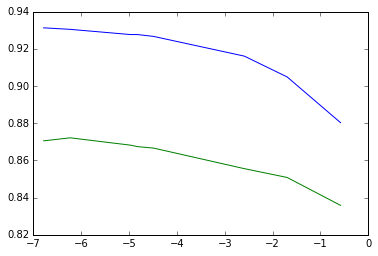

In [44]:
for i in np.arange(10):
    prd_e[i,0],prd_e[i,1] = BernoulliNB_sum(X_train_counts, y_train, X_val_counts,y_val, alpha= 10**alphas[i])
plt.plot(alphas, prd_e)
print(alphas)
alpha = 5e-6
print(alpha)


performance for the training data
             precision    recall  f1-score   support

          0       1.00      0.86      0.92      2512
          1       0.88      1.00      0.93      2492

avg / total       0.94      0.93      0.93      5004

performance for the test data
             precision    recall  f1-score   support

          0       0.92      0.81      0.86       629
          1       0.83      0.93      0.88       638

avg / total       0.88      0.87      0.87      1267



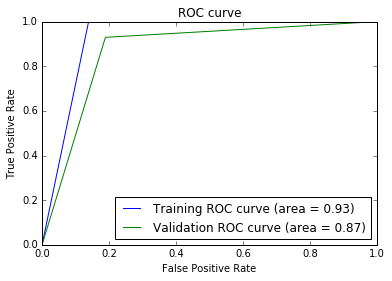

In [45]:
BNclf = BernoulliNB_sum(X_train_counts, y_train, X_val_counts,y_val, alpha= 5e-6, plotROC = True)


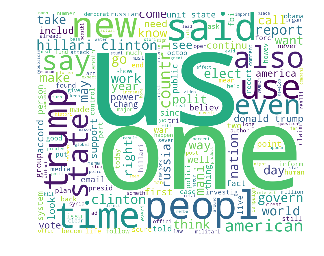

In [49]:
predict_train = BNclf.predict(X_val_counts)
# fkn1 = fkn[fkn["label"] == 0]
# texts = fkn1["text"]
# texts = texts.apply(lambda x: " ".join(x))
texts = validate_dt["text"][predict_train>.8]
wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(texts))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

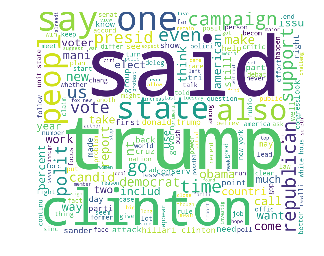

In [50]:
texts = validate_dt["text"][predict_train<.2]
wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(texts))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [51]:
def predict_text(model, text, trained_tokenizer, max_len=2000):
    cleaned = clean_text(text)
    index = word2indx(cleaned, trained_tokenizer, max_len)
    prediction = model.predict(index).flatten()
    prob_true = float(prediction[0] * 100)
    return prob_true

In [52]:
cd project/news

[Errno 2] No such file or directory: 'project/news'
/data/nasif12/home_if12/chengju/project/news


In [55]:
import pandas as pd
from src.prediction import clean_text, word2indx, predict_from_index 
from src.prediction import predict_news, get_text_title
from keras.models import load_model
import pickle
model = load_model("./data/models/CNN_LSTM2")
tokenizer = pickle.load(open("./data/tokenizer.pkl", 'rb'))   

In [56]:
y_pred = validate_dt["text"].apply(lambda x: predict_text(model, " ".join(x), tokenizer))

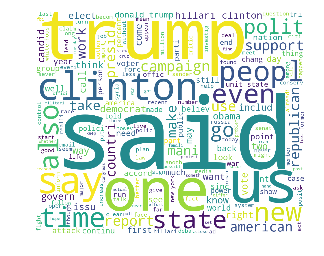

In [62]:
texts = validate_dt["text"][y_pred>.8]
wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(texts))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

Computing PCA projection


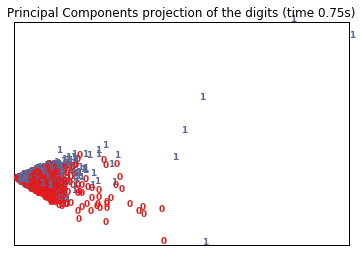

In [41]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
X = X_train_counts
y = y_train
n_samples, n_features = X.shape
n_neighbors = 30

#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(len(y)):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
        #             imagebox = offsetbox.AnnotationBbox(
        #                 offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
        #                 X[i])
        #             ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
# Projection on to the first 2 principal components
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))
# # Projection on to the first 2 linear discriminant components
# print("Computing Linear Discriminant Analysis projection")
# X2 = X.copy()
# X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
# t0 = time()
# X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X2, y)
# plot_embedding(X_lda,
#                "Linear Discriminant projection of the digits (time %.2fs)" %
#                (time() - t0))


Computing Isomap embedding
Done.


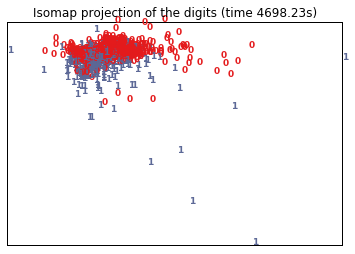

In [42]:
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X.toarray())
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))


Computing t-SNE embedding


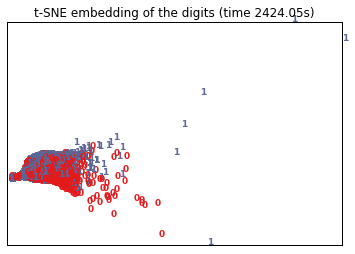

In [44]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X.toarray())



In [1]:
plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()


NameError: name 'plot_embedding' is not defined

In [ ]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import pickle
from keras.preprocessing.sequence import pad_sequences

from keras.models import load_model
from src.prediction import predict_text, get_text_title
from keras.models import load_model
import pickle

model = load_model("./data/models/CNN_LSTM2")
tokenizer = pickle.load(open("./data/tokenizer.pkl", 'rb'))


In [ ]:
fkn = pd.read_pickle("./data/fkn.gzip")

In [ ]:
texts = fkn["text"]

y_pred = texts.apply(lambda x: " ".join(x))

